# Importing libraries and uploading the data

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [72]:
salesdata = '/content/drive/MyDrive/Coding Dojo/Week 2/sales_predictions.csv'
sales_df = pd.read_csv(salesdata)
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Cleaning the data

In [73]:
# Replace all the Item weight NaN values with their mean values corresponding to their item type
# https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

sales_df['Item_Weight'] = sales_df['Item_Weight'].fillna(sales_df.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [74]:
# Will not use outlet size column as there is no sure way to infer what the size of the outlet is
sales_clean2 = sales_df.drop(columns = 'Outlet_Size')

In [75]:
# More data cleaning
sales_clean = sales_clean2.replace(to_replace =['low fat', 'LF'], value ='Low Fat')

sales_clean = sales_clean.replace(to_replace ='reg', value ='Regular')

sales_clean.value_counts(['Item_Fat_Content'])

Item_Fat_Content
Low Fat             5517
Regular             3006
dtype: int64

# Data Visualization

Let's look at what item type has the best visibility and sales

In [76]:
sales_mean1 = sales_clean.drop(columns = ['Item_Weight', 'Outlet_Establishment_Year', 'Item_MRP', 'Item_Fat_Content', 
                                         'Item_Identifier', 'Outlet_Location_Type', 'Outlet_Identifier', 'Outlet_Type' ])

In [77]:
sales_mean = sales_mean1.groupby(['Item_Type'], as_index = False).mean()
sales_mean

,Item_Type,Item_Visibility,Item_Outlet_Sales
0,Baking Goods,0.069169,1952.971207
1,Breads,0.066255,2204.132226
2,Breakfast,0.085723,2111.808651
3,Canned,0.068129,2225.194904
4,Dairy,0.072427,2232.542597
5,Frozen Foods,0.065645,2132.867744
6,Fruits and Vegetables,0.068513,2289.009592
7,Hard Drinks,0.064943,2139.221622
8,Health and Hygiene,0.055216,2010.000265
9,Household,0.061322,2258.784300


Let's graph which item type is most visible

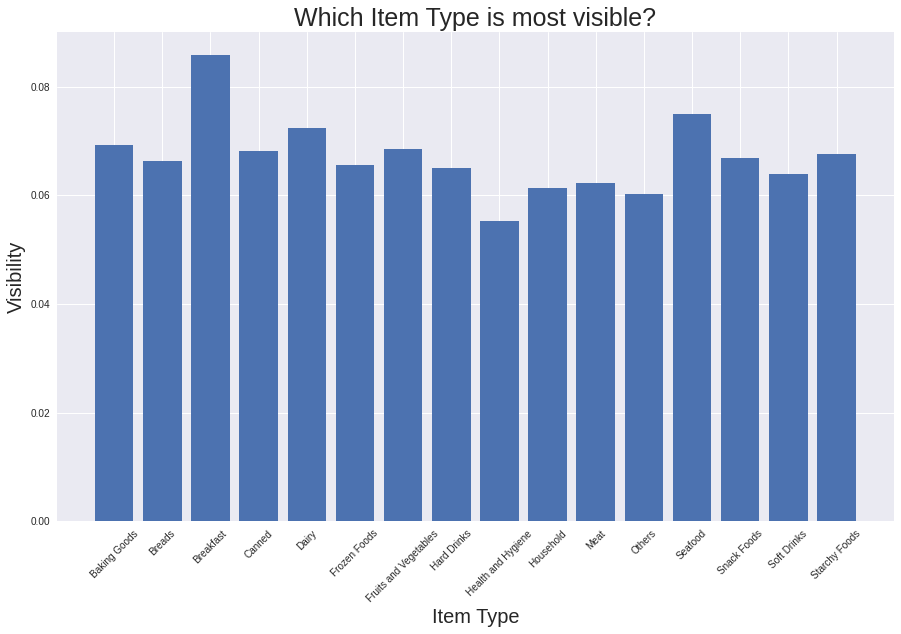

In [78]:
plt.figure(figsize = (15, 9));
plt.bar(sales_mean['Item_Type'], sales_mean['Item_Visibility']);
plt.xticks(rotation = 45);
plt.title('Which Item Type is most visible?', fontsize = 25);
plt.xlabel('Item Type', fontsize = 20);
plt.ylabel('Visibility', fontsize = 20);

As you can see, our most visible items are breakfast items followed by seafood

Now lets graph which item type sells more


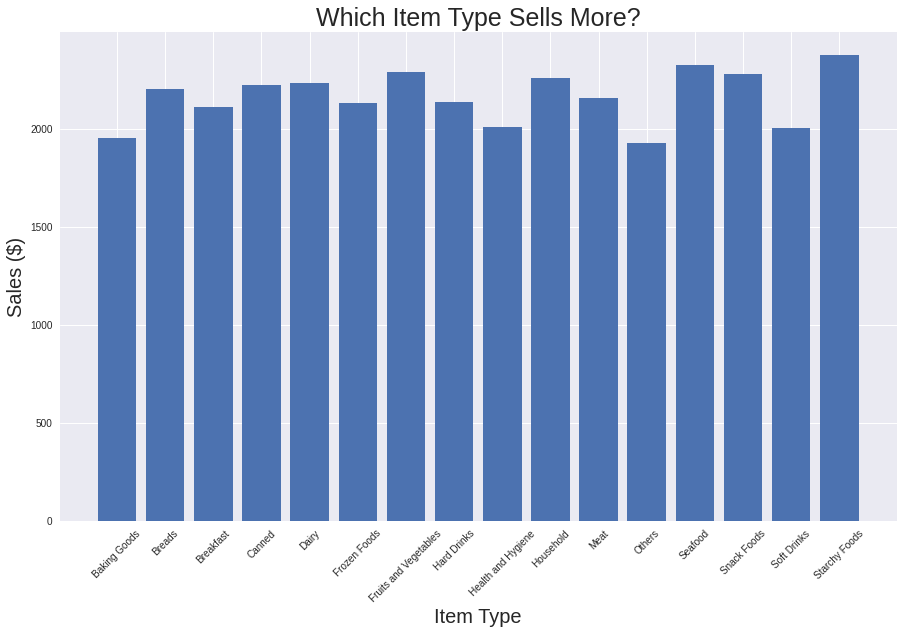

In [79]:
plt.figure(figsize = (15, 9));
plt.bar(sales_mean['Item_Type'], sales_mean['Item_Outlet_Sales']);
plt.xticks(rotation = 45);
plt.title('Which Item Type Sells More?', fontsize = 25);
plt.xlabel('Item Type', fontsize = 20);
plt.ylabel('Sales ($)', fontsize = 20);

Here, our biggest sellers are starchy foods and seafood, but oddly enough breakfast foods aren't selling as much even with all the visibility. Maybe breakfast items are too expensive or maybe people just do not eat breakfast nowadays. You can give the outlet space to a different item type if analysis shows that breakfast item sales will not incease with more visibility. And on the flip side, starchy foods are selling really well despite not being as visible. We should take advantage of this by giving more visibility to the item to really drive up its sales. Further investigation is recommended for both breakfast items and starchy foods.

Let's look at meats and seafood since they are both proteins

In [80]:
sales_protein = sales_mean.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15])
sales_protein

,Item_Type,Item_Visibility,Item_Outlet_Sales
10,Meat,0.062284,2158.977911
12,Seafood,0.074976,2326.065928


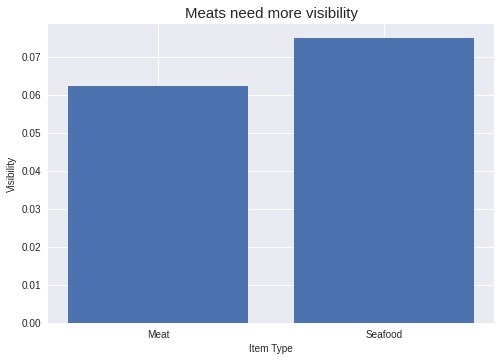

In [81]:
plt.bar(sales_protein['Item_Type'], sales_protein['Item_Visibility']);
plt.title('Meats need more visibility', fontsize = 15);
plt.xlabel('Item Type', fontsize = 10);
plt.ylabel('Visibility', fontsize = 10);

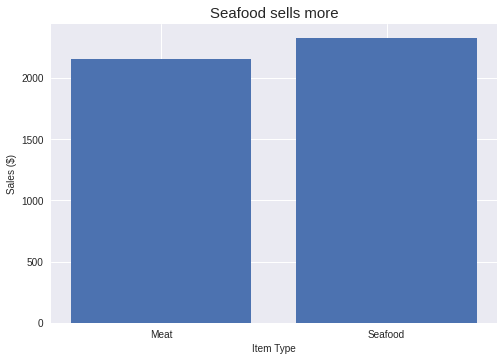

In [82]:
plt.bar(sales_protein['Item_Type'], sales_protein['Item_Outlet_Sales']);
plt.title('Seafood sells more', fontsize = 15);
plt.xlabel('Item Type', fontsize = 10);
plt.ylabel('Sales ($)', fontsize = 10);

There is a good possibility that if you were to increase the visibility of meats, you would see an increase in sales to where seafood is at. Investing in the butchery sections of the outlets is recommended.

Boxplot

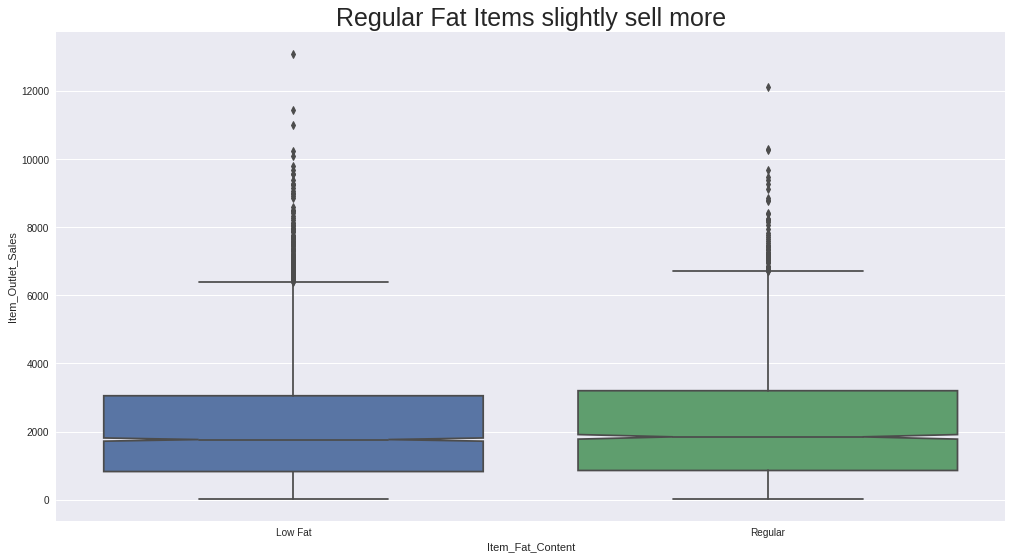

In [83]:
plt.figure(figsize=(17, 9));
plt.style.use('seaborn');
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data = sales_clean, notch = True);
plt.title('Regular Fat Items slightly sell more', fontsize = 25);

The amount of sales regular foods sell is slightly more than low fat foods but the outlier in the low fat food item is much higher. Investigation as to why that one low fat product did so well is recommended

# Preparing Data for machine learning

Need to use panda dummies to one hot encode (ohe) some columns


In [84]:
df = pd.get_dummies(sales_clean, columns = ['Item_Fat_Content', 'Item_Type', 
                                            'Outlet_Identifier', 'Outlet_Establishment_Year', 
                                            'Outlet_Location_Type', 'Outlet_Type'], drop_first = True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
2,FDN15,17.50,0.016760,141.6180,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0


In [85]:
# We actually don't need item identifier
df = df.drop(columns = ['Item_Identifier'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Item_Outlet_Sales                8523 non-null   float64
 4   Item_Fat_Content_Regular         8523 non-null   uint8  
 5   Item_Type_Breads                 8523 non-null   uint8  
 6   Item_Type_Breakfast              8523 non-null   uint8  
 7   Item_Type_Canned                 8523 non-null   uint8  
 8   Item_Type_Dairy                  8523 non-null   uint8  
 9   Item_Type_Frozen Foods           8523 non-null   uint8  
 10  Item_Type_Fruits and Vegetables  8523 non-null   uint8  
 11  Item_Type_Hard Drinks            8523 non-null   uint8  
 12  Item_Type_Health and

In [86]:
# Now we define X and y

X = df.loc[:, df.columns!='Item_Outlet_Sales']

y = df.loc[:, ['Item_Outlet_Sales']]

In [87]:
X.shape

(8523, 41)

In [88]:
y.shape

(8523, 1)

In [89]:
# We need to standardize first for a KNN

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Regression

In [90]:
# Train Test Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11)

In [91]:
RF = RandomForestRegressor(random_state= 11)

In [92]:
# Fixing an error given by the y_train 
# https://stackoverflow.com/questions/29263099/dataconversionwarning-fitting-randomforestregressor-in-scikit
RF.fit(X_train, y_train.values.ravel());

In [93]:
score = RF.score(X_test, y_test)
score

0.5637651438481188

In [94]:
# Let's create a for loop to determine the best possible n_estimators for our parameters

# List of values to try for n_estimators:
estimator_range = [1] + list(range(10, 160, 10))

In [95]:
# Now we write the for loop

scores = []

for estimator in estimator_range:
    RF = RandomForestRegressor(n_estimators=estimator,
                                 random_state=11,
                                 bootstrap=True)
    RF.fit(X_train, y_train.values.ravel())
    scores.append(RF.score(X_test, y_test))

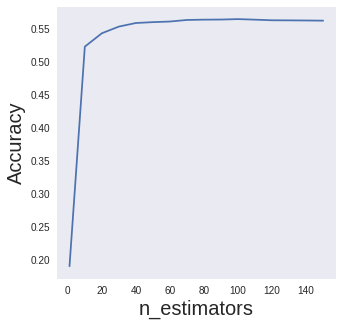

In [96]:
# Lets plot the results 
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()

Looks like the most accurate models uses around 100 estimators, so the default value

In [97]:
RF = RandomForestRegressor(n_estimators = 100,
                           random_state = 11,
                           bootstrap = True)
RF.fit(X_train, y_train.values.ravel())
score = RF.score(X_test, y_test)
score

0.5637651438481188

# KNN Regression

In [98]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [99]:
score = knn.score(X_test, y_test)
score

0.41680500756274536

In [100]:
# Making a for loop to find the best n_neighbors value
neighbors_range = list(range(1, 20))

scores = []

for neighbors in neighbors_range:
    knn = KNeighborsRegressor(n_neighbors = neighbors)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

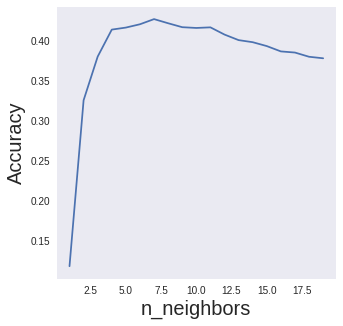

In [101]:
# Lets plot the results 
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(neighbors_range, scores);
axes.set_xlabel('n_neighbors', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()

n_neighbors at 7 yeilds the greatest score so let us use 7

In [102]:
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(X_train, y_train)

score = knn.score(X_test, y_test)
score

0.4273979091513302

## In Conclusion

The random forest model gave us a better r^2 result than the KNN model. Therefore, using a random forest regression will give us the best possible chance of predicting item outlet sales